In [18]:
import networkx as nx
import matplotlib.pyplot as plt
import copy, time
from IPython.display import Image, display


def draw_topology(G, title, filename, color='skyblue'):
    """Draw network topology inline in Colab and save image."""
    pos = nx.spring_layout(G, seed=42)
    labels = nx.get_edge_attributes(G, 'weight')
    plt.figure(figsize=(5,4))
    nx.draw(G, pos, with_labels=True, node_color=color, node_size=1200,
            font_size=12, font_weight='bold', edgecolors='black')
    if labels:
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title(title)
    plt.savefig(filename, bbox_inches='tight')
    plt.show()  # 👈 Display inline in Colab
    plt.close()
    display(Image(filename=filename))

# **Part 1: RIP (Routing Information Protocol)**

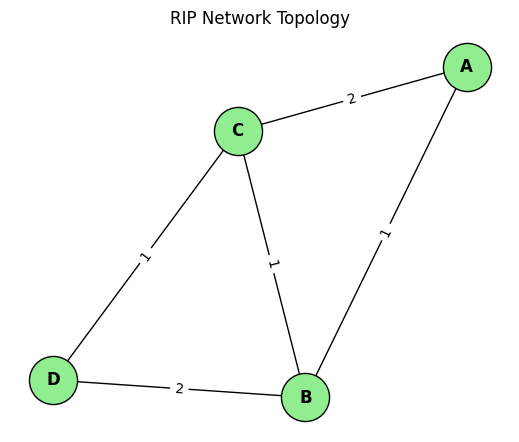


=== RIP Iteration 1 ===

Router A Table:
  A: cost=0, next-hop=A
  B: cost=1, next-hop=B
  C: cost=2, next-hop=C
  D: cost=3, next-hop=B

Router B Table:
  A: cost=1, next-hop=A
  B: cost=0, next-hop=B
  C: cost=1, next-hop=C
  D: cost=2, next-hop=D

Router C Table:
  A: cost=2, next-hop=A
  B: cost=1, next-hop=B
  C: cost=0, next-hop=C
  D: cost=1, next-hop=D

Router D Table:
  A: cost=3, next-hop=C
  B: cost=2, next-hop=B
  C: cost=1, next-hop=C
  D: cost=0, next-hop=D

=== RIP Iteration 2 ===

Router A Table:
  A: cost=0, next-hop=A
  B: cost=1, next-hop=B
  C: cost=2, next-hop=C
  D: cost=3, next-hop=B

Router B Table:
  A: cost=1, next-hop=A
  B: cost=0, next-hop=B
  C: cost=1, next-hop=C
  D: cost=2, next-hop=D

Router C Table:
  A: cost=2, next-hop=A
  B: cost=1, next-hop=B
  C: cost=0, next-hop=C
  D: cost=1, next-hop=D

Router D Table:
  A: cost=3, next-hop=C
  B: cost=2, next-hop=B
  C: cost=1, next-hop=C
  D: cost=0, next-hop=D

RIP Converged!



In [27]:
def simulate_rip():
    G = nx.Graph()
    edges = [("A", "B", 1), ("B", "C", 1), ("A", "C", 2), ("C", "D", 1), ("B", "D", 2)]
    G.add_weighted_edges_from(edges)
    draw_topology(G, "RIP Network Topology", "rip_topology.png", color='lightgreen')

    routers = list(G.nodes())
    routing_table = {r: {d: (float('inf'), None) for d in routers} for r in routers}
    for r in routers:
        routing_table[r][r] = (0, r)
        for n in G.neighbors(r):
            routing_table[r][n] = (G[r][n]['weight'], n)

    def exchange_tables():
        changed = False
        new_table = copy.deepcopy(routing_table)
        for r in routers:
            for n in G.neighbors(r):
                for dest in routers:
                    cost = G[r][n]['weight'] + routing_table[n][dest][0]
                    if cost < new_table[r][dest][0]:
                        new_table[r][dest] = (cost, n)
                        changed = True
        return new_table, changed

    iteration = 0
    while True:
        iteration += 1
        print(f"\n=== RIP Iteration {iteration} ===")
        routing_table, changed = exchange_tables()
        for r in routers:
            print(f"\nRouter {r} Table:")
            for d, (c, nh) in routing_table[r].items():
                print(f"  {d}: cost={c}, next-hop={nh}")
        if not changed:
            print("\nRIP Converged!\n")
            break
        time.sleep(0.5)

simulate_rip()

# **Part 2: OSPF (Open Shortest Path First)**

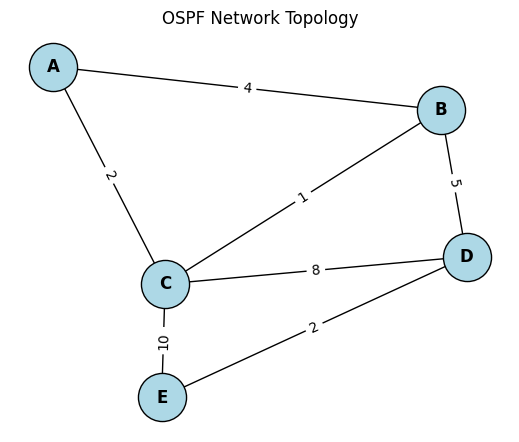


Router A Shortest Path Tree (OSPF):
  A → A: cost=0, path=['A']
  A → B: cost=3, path=['A', 'C', 'B']
  A → C: cost=2, path=['A', 'C']
  A → D: cost=8, path=['A', 'C', 'B', 'D']
  A → E: cost=10, path=['A', 'C', 'B', 'D', 'E']

Router B Shortest Path Tree (OSPF):
  B → B: cost=0, path=['B']
  B → A: cost=3, path=['B', 'C', 'A']
  B → C: cost=1, path=['B', 'C']
  B → D: cost=5, path=['B', 'D']
  B → E: cost=7, path=['B', 'D', 'E']

Router C Shortest Path Tree (OSPF):
  C → C: cost=0, path=['C']
  C → A: cost=2, path=['C', 'A']
  C → B: cost=1, path=['C', 'B']
  C → D: cost=6, path=['C', 'B', 'D']
  C → E: cost=8, path=['C', 'B', 'D', 'E']

Router D Shortest Path Tree (OSPF):
  D → D: cost=0, path=['D']
  D → B: cost=5, path=['D', 'B']
  D → C: cost=6, path=['D', 'B', 'C']
  D → E: cost=2, path=['D', 'E']
  D → A: cost=8, path=['D', 'B', 'C', 'A']

Router E Shortest Path Tree (OSPF):
  E → E: cost=0, path=['E']
  E → C: cost=8, path=['E', 'D', 'B', 'C']
  E → D: cost=2, path=['E', 'D']


In [28]:
def simulate_ospf():
    G = nx.Graph()
    edges = [
        ("A","B",4), ("A","C",2), ("B","C",1),
        ("B","D",5), ("C","D",8), ("C","E",10), ("D","E",2)
    ]
    G.add_weighted_edges_from(edges)
    draw_topology(G, "OSPF Network Topology", "ospf_topology.png", color='lightblue')

    for r in G.nodes():
        print(f"\nRouter {r} Shortest Path Tree (OSPF):")
        paths = nx.single_source_dijkstra_path(G, r, weight='weight')
        for dest, path in paths.items():
            cost = sum(G[path[i]][path[i+1]]['weight'] for i in range(len(path)-1))
            print(f"  {r} → {dest}: cost={cost}, path={path}")

simulate_ospf()

# **Part 3: BGP (Border Gateway Protocol)**

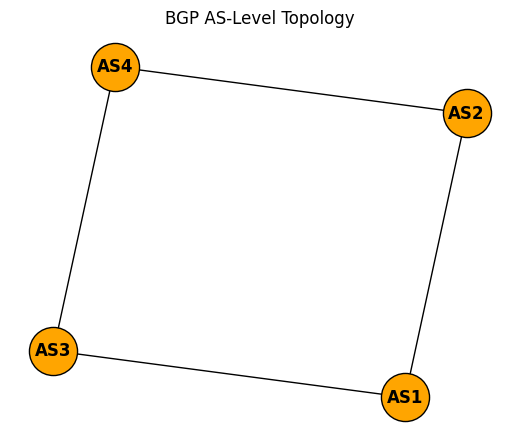


=== BGP Iteration 1 ===

Router AS1 Routing Table:
  to AS1: path=['AS1']
  to AS2: path=['AS1', 'AS2']
  to AS3: path=['AS1', 'AS3']

Router AS2 Routing Table:
  to AS2: path=['AS2']
  to AS1: path=['AS2', 'AS1']
  to AS4: path=['AS2', 'AS4']

Router AS3 Routing Table:
  to AS3: path=['AS3']
  to AS1: path=['AS3', 'AS1']
  to AS4: path=['AS3', 'AS4']

Router AS4 Routing Table:
  to AS4: path=['AS4']
  to AS2: path=['AS4', 'AS2']
  to AS3: path=['AS4', 'AS3']

=== BGP Iteration 2 ===

Router AS1 Routing Table:
  to AS1: path=['AS1']
  to AS2: path=['AS1', 'AS2']
  to AS3: path=['AS1', 'AS3']
  to AS4: path=['AS1', 'AS2', 'AS4']

Router AS2 Routing Table:
  to AS2: path=['AS2']
  to AS1: path=['AS2', 'AS1']
  to AS4: path=['AS2', 'AS4']
  to AS3: path=['AS2', 'AS1', 'AS3']

Router AS3 Routing Table:
  to AS3: path=['AS3']
  to AS1: path=['AS3', 'AS1']
  to AS4: path=['AS3', 'AS4']
  to AS2: path=['AS3', 'AS1', 'AS2']

Router AS4 Routing Table:
  to AS4: path=['AS4']
  to AS2: path=['AS

In [29]:
def simulate_bgp():
    topology = {
        "AS1": ["AS2", "AS3"],
        "AS2": ["AS1", "AS4"],
        "AS3": ["AS1", "AS4"],
        "AS4": ["AS2", "AS3"]
    }

    G = nx.Graph()
    for k, v in topology.items():
        for n in v:
            G.add_edge(k, n)
    draw_topology(G, "BGP AS-Level Topology", "bgp_topology.png", color='orange')

    routes = {as_: {as_: [as_]} for as_ in topology}

    def bgp_update():
        changed = False
        new_routes = {as_: dict(routes[as_]) for as_ in routes}
        for as_ in topology:
            for neighbor in topology[as_]:
                for dest, path in routes[neighbor].items():
                    if as_ in path:
                        continue  # loop prevention
                    new_path = [as_] + path
                    if dest not in new_routes[as_] or len(new_path) < len(new_routes[as_][dest]):
                        new_routes[as_][dest] = new_path
                        changed = True
        return new_routes, changed

    iteration = 0
    while True:
        iteration += 1
        print(f"\n=== BGP Iteration {iteration} ===")
        routes, changed = bgp_update()
        for as_ in routes:
            print(f"\nRouter {as_} Routing Table:")
            for dest, path in routes[as_].items():
                print(f"  to {dest}: path={path}")
        if not changed:
            print("\nBGP Converged!\n")
            break

simulate_bgp()

# **Part 4: IS-IS (Intermediate System to Intermediate System)**

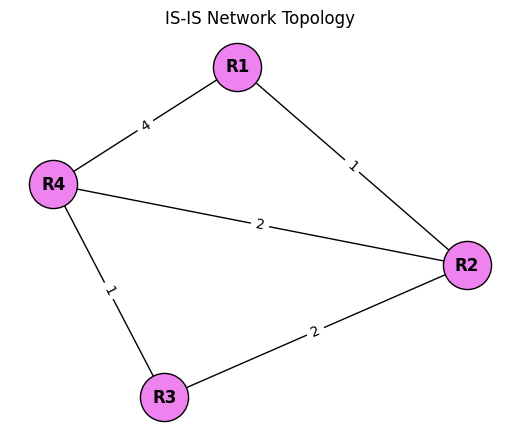

Simulating IS-IS Link-State Flooding:
Router R1 floods LSPs to neighbors: ['R2', 'R4']
Router R2 floods LSPs to neighbors: ['R1', 'R3', 'R4']
Router R3 floods LSPs to neighbors: ['R2', 'R4']
Router R4 floods LSPs to neighbors: ['R3', 'R1', 'R2']

Router R1 Routing Table (IS-IS):
  to R1: cost=0, path=['R1']
  to R2: cost=1, path=['R1', 'R2']
  to R4: cost=3, path=['R1', 'R2', 'R4']
  to R3: cost=3, path=['R1', 'R2', 'R3']

Router R2 Routing Table (IS-IS):
  to R2: cost=0, path=['R2']
  to R1: cost=1, path=['R2', 'R1']
  to R3: cost=2, path=['R2', 'R3']
  to R4: cost=2, path=['R2', 'R4']

Router R3 Routing Table (IS-IS):
  to R3: cost=0, path=['R3']
  to R2: cost=2, path=['R3', 'R2']
  to R4: cost=1, path=['R3', 'R4']
  to R1: cost=3, path=['R3', 'R2', 'R1']

Router R4 Routing Table (IS-IS):
  to R4: cost=0, path=['R4']
  to R3: cost=1, path=['R4', 'R3']
  to R1: cost=3, path=['R4', 'R2', 'R1']
  to R2: cost=2, path=['R4', 'R2']


In [30]:
def simulate_isis():
    G = nx.Graph()
    edges = [
        ("R1","R2",1), ("R2","R3",2),
        ("R3","R4",1), ("R1","R4",4), ("R2","R4",2)
    ]
    G.add_weighted_edges_from(edges)
    draw_topology(G, "IS-IS Network Topology", "isis_topology.png", color='violet')

    print("Simulating IS-IS Link-State Flooding:")
    for r in G.nodes():
        print(f"Router {r} floods LSPs to neighbors: {list(G.neighbors(r))}")

    for r in G.nodes():
        print(f"\nRouter {r} Routing Table (IS-IS):")
        paths = nx.single_source_dijkstra_path(G, r, weight='weight')
        for dest, path in paths.items():
            cost = sum(G[path[i]][path[i+1]]['weight'] for i in range(len(path)-1))
            print(f"  to {dest}: cost={cost}, path={path}")

simulate_isis()